In [72]:
! pip install jieba wordcloud matplotlib
! pip install textblob


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Jessica\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Jessica\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [73]:
import requests
from bs4 import BeautifulSoup
import re
import jieba
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [74]:
headers={"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36"}
#設置網站
url = 'https://news.ltn.com.tw/list/breakingnews/world'
response = requests.get(url)

In [75]:
soup = BeautifulSoup(response.text, 'lxml')
# 提取 h2 标签中的 title 属性值
titles = soup.find_all("h3")

print(titles)

[<h3 class="title">向伊斯蘭國家喊話  伊朗總統：應將以色列軍隊視為恐怖組織</h3>, <h3 class="title">短期利率暴衝至50％！ 中國發債拼經濟 反陷流動性緊縮</h3>, <h3 class="title">毛澤東群眾鬥爭重演？ 習近平重推「楓橋經驗」</h3>, <h3 class="title">火山岩漿恐在地下蔓延 冰島宣布進入緊急狀態 撤離數千居民</h3>, <h3 class="title">日美菲聯合抗中 日本邀菲律賓參加聯合軍演</h3>, <h3 class="title">因海平面上升將失去住所 澳洲為吐瓦魯公民提供居住權</h3>, <h3 class="title">克羅埃西亞國防部長車禍 頭部受重創無生命危險</h3>, <h3 class="title">拜習會將宣布對AI軍用設限 禁用於無人機、核武控制部署</h3>, <h3 class="title">孟加拉血汗成衣廠加薪抗爭 上百工廠關門 上萬工人遭訴</h3>, <h3 class="title">「小粉紅的一生」作者新作！ 《當中國解放了全世界》故事震撼網友</h3>, <h3 class="title">防北韓學哈瑪斯突襲 美韓防長擬討論終止《九一九軍事協議》效力</h3>, <h3 class="title">DNA不符！被控性侵11歲少女 美國男子坐冤獄35年獲釋</h3>, <h3 class="title">伊朗總統稱對加薩應採取實際行動 呼籲伊斯蘭世界團結</h3>, <h3 class="title">老不修！馬來西亞72歲色翁闖鄰家 欲性侵76歲獨居寡婦</h3>, <h3 class="title">排隊買麵包遭炸死！聯合國101名工作人員命喪加薩有史以來最慘</h3>, <h3 class="title">硫磺島外海火山噴發形成小島 日專家：可能因海浪侵蝕漸縮小</h3>, <h3 class="title">夏威夷突然出現「芭比粉紫水塘」 專家：恐是乾旱造成</h3>, <h3 class="title">中國民怨四起！大量實名舉報影片痛斥官員貪汙、草菅人命</h3>, <h3 class="title">美高級將領憂加薩戰事拖久不利以色列 恐更多人加入哈瑪斯</h3>, <h3 class="title">廣州教學

In [76]:
# 將 ResultSet 轉換為字符
text = "\n".join([title.get_text() for title in titles])


In [77]:
import string
# 使用正则表达式提取 h3 标签中的内容
titles = [tag.get_text(strip=True) for tag in soup.find_all('h3')]

# 定义一个函数，用于去除标点符号
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# 对标题进行正则化和去除标点符号
normal = [remove_punctuation(re.sub(r'<.*?>', '', title)) for title in titles]

print(normal)

['向伊斯蘭國家喊話  伊朗總統應將以色列軍隊視為恐怖組織', '短期利率暴衝至50 中國發債拼經濟 反陷流動性緊縮', '毛澤東群眾鬥爭重演 習近平重推楓橋經驗', '火山岩漿恐在地下蔓延 冰島宣布進入緊急狀態 撤離數千居民', '日美菲聯合抗中 日本邀菲律賓參加聯合軍演', '因海平面上升將失去住所 澳洲為吐瓦魯公民提供居住權', '克羅埃西亞國防部長車禍 頭部受重創無生命危險', '拜習會將宣布對AI軍用設限 禁用於無人機核武控制部署', '孟加拉血汗成衣廠加薪抗爭 上百工廠關門 上萬工人遭訴', '小粉紅的一生作者新作 當中國解放了全世界故事震撼網友', '防北韓學哈瑪斯突襲 美韓防長擬討論終止九一九軍事協議效力', 'DNA不符被控性侵11歲少女 美國男子坐冤獄35年獲釋', '伊朗總統稱對加薩應採取實際行動 呼籲伊斯蘭世界團結', '老不修馬來西亞72歲色翁闖鄰家 欲性侵76歲獨居寡婦', '排隊買麵包遭炸死聯合國101名工作人員命喪加薩有史以來最慘', '硫磺島外海火山噴發形成小島 日專家可能因海浪侵蝕漸縮小', '夏威夷突然出現芭比粉紫水塘 專家恐是乾旱造成', '中國民怨四起大量實名舉報影片痛斥官員貪汙草菅人命', '美高級將領憂加薩戰事拖久不利以色列 恐更多人加入哈瑪斯', '廣州教學醫院爆集體罹癌  凸顯中國實驗室隱憂']


In [78]:
# 将列表合并为一个字符串
merged= ''.join(normal)

print(merged)

向伊斯蘭國家喊話  伊朗總統應將以色列軍隊視為恐怖組織短期利率暴衝至50 中國發債拼經濟 反陷流動性緊縮毛澤東群眾鬥爭重演 習近平重推楓橋經驗火山岩漿恐在地下蔓延 冰島宣布進入緊急狀態 撤離數千居民日美菲聯合抗中 日本邀菲律賓參加聯合軍演因海平面上升將失去住所 澳洲為吐瓦魯公民提供居住權克羅埃西亞國防部長車禍 頭部受重創無生命危險拜習會將宣布對AI軍用設限 禁用於無人機核武控制部署孟加拉血汗成衣廠加薪抗爭 上百工廠關門 上萬工人遭訴小粉紅的一生作者新作 當中國解放了全世界故事震撼網友防北韓學哈瑪斯突襲 美韓防長擬討論終止九一九軍事協議效力DNA不符被控性侵11歲少女 美國男子坐冤獄35年獲釋伊朗總統稱對加薩應採取實際行動 呼籲伊斯蘭世界團結老不修馬來西亞72歲色翁闖鄰家 欲性侵76歲獨居寡婦排隊買麵包遭炸死聯合國101名工作人員命喪加薩有史以來最慘硫磺島外海火山噴發形成小島 日專家可能因海浪侵蝕漸縮小夏威夷突然出現芭比粉紫水塘 專家恐是乾旱造成中國民怨四起大量實名舉報影片痛斥官員貪汙草菅人命美高級將領憂加薩戰事拖久不利以色列 恐更多人加入哈瑪斯廣州教學醫院爆集體罹癌  凸顯中國實驗室隱憂


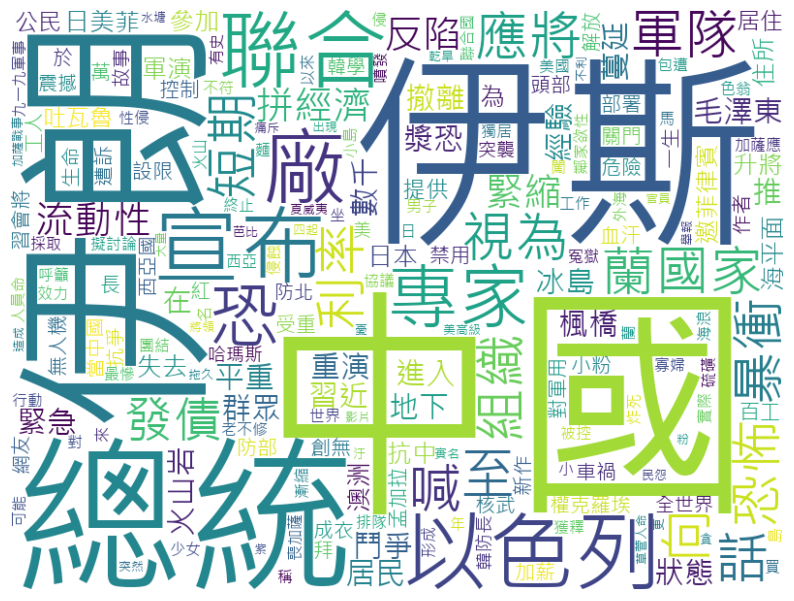

In [79]:
# 定义需要删除的连接词列表
stopwords =  r"的|了|和|是|就|也|歲|等|因|上"
cleaned_text = re.sub(r'[A-Za-z!@#$%^&*()_+{}[\]:;"\'<>,.?~\\/\-|=]', '', text)
cleaned_text = re.sub(stopwords, '', cleaned_text)
cleaned_text = re.sub(r'\s+', '', cleaned_text)

# 使用 jieba 进行中文分词
seg_list = jieba.cut(cleaned_text, cut_all=False)
# 将分词结果连接为一个字符串
seg_string = ' '.join(seg_list)

# 设置字体路径
font_path = "c:\Windows\Fonts\msjh.ttc"

# 创建 WordCloud 对象
wc = WordCloud(
    font_path=font_path,
    background_color="white",
    width=800,
    height=600
)

# 生成词云图像
wordcloud = wc.generate(seg_string)

# 显示词云
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()